<a href="https://colab.research.google.com/github/ScriptSherpa/DS-SEM5-PERSONA-OUTPUTS/blob/main/DS6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NIKHIL MALVI
B 50


**Iris Dataset Classification using Gaussian Naive Bayes**

In this task, we applied **Gaussian Naive Bayes** classification on the **Iris dataset**. Below is a breakdown of the steps performed:

1. **Dataset Loading and Preprocessing**:
   - The Iris dataset was loaded using the `load_iris()` function from **scikit-learn**'s inbuilt datasets.
   - The dataset consists of 4 features (sepal length, sepal width, petal length, and petal width) and a target variable representing 3 classes of Iris species (setosa, versicolor, virginica). The features were separated from the target variable and stored in **X** and **y**, respectively.

2. **Train-Test Split**:
   - The dataset was split into training and testing sets using the `train_test_split()` function. 80% of the data was used for training, and 20% was used for testing. This split helps to train the model on one portion of the data and evaluate its performance on unseen data (test set).

3. **Feature Scaling**:
   - Though Gaussian Naive Bayes does not strictly require feature scaling, the features were scaled using **StandardScaler** for consistency with standard practices in machine learning.

4. **Model Training**:
   - A **Gaussian Naive Bayes** classifier was initialized using `GaussianNB()` from scikit-learn. The model was then trained on the training data (`X_train` and `y_train`) using the `fit()` method.

5. **Prediction**:
   - After training, the model was used to predict the species of Iris flowers in the test set (`X_test`). The predicted species were stored in `y_pred`.

6. **Model Evaluation**:
   - To evaluate the model’s performance, a **confusion matrix** was generated using `confusion_matrix()` from **scikit-learn**. This matrix gives us a detailed breakdown of how well the model classified the test set.
     - **True Positives (TP)**: Correctly predicted positive classes (species).
     - **False Positives (FP)**: Incorrectly predicted positive classes.
     - **True Negatives (TN)**: Correctly predicted negative classes.
     - **False Negatives (FN)**: Incorrectly predicted negative classes.
   
   - **Performance Metrics**:
     - **Accuracy**: The proportion of correct predictions (calculated using `accuracy_score`).
     - **Error Rate**: The proportion of incorrect predictions, calculated as `1 - accuracy`.
     - **Precision**: The proportion of true positive predictions among all positive predictions, weighted by class.
     - **Recall**: The proportion of true positive predictions among all actual positive instances, weighted by class.

7. **Results**:
   - Finally, the confusion matrix and the key performance metrics (accuracy, error rate, precision, recall) were printed for evaluation.



In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Load the Iris dataset from sklearn's inbuilt datasets
from sklearn.datasets import load_iris
iris = load_iris()

# Create DataFrame from the Iris dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target  # Adding the target variable (species)

# Selecting features (X) and target variable (y)
X = df.iloc[:, :-1]  # All columns except the last (target column)
y = df.iloc[:, -1]   # Target column (species)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes model
model = GaussianNB()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Confusion matrix for multi-class classification
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(f"Confusion Matrix:\n{cm}")

# Calculate performance metrics for multi-class classification
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy

# For multi-class, precision and recall can be computed using the 'weighted' average
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision (Weighted): {precision:.2f}")
print(f"Recall (Weighted): {recall:.2f}")



Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.00
Error Rate: 0.00
Precision (Weighted): 1.00
Recall (Weighted): 1.00


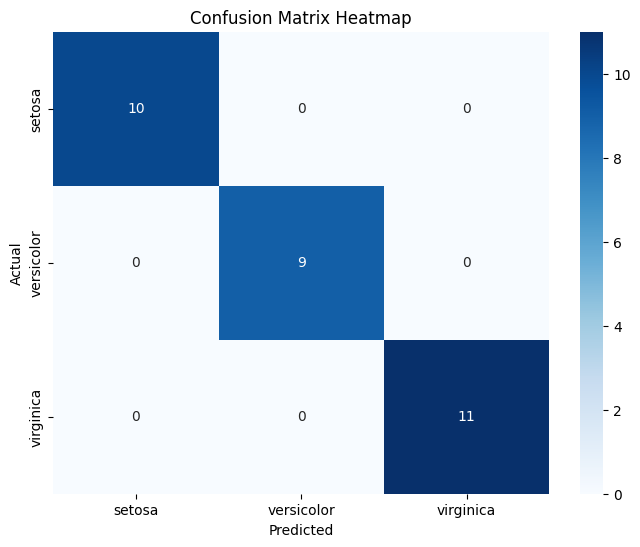

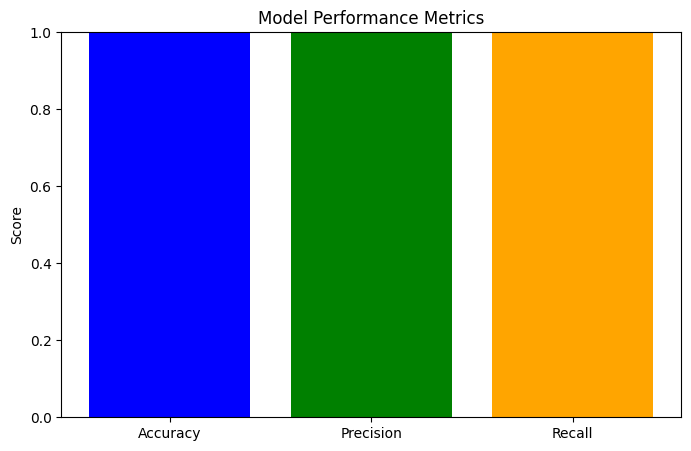

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix Heatmap for Multi-class Classification
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Accuracy, Precision, Recall
metrics = [accuracy, precision, recall]
metrics_names = ['Accuracy', 'Precision', 'Recall']

plt.figure(figsize=(8, 5))
plt.bar(metrics_names, metrics, color=['blue', 'green', 'orange'])
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()
